<a href="https://colab.research.google.com/github/Felipeagq/Spacy/blob/main/earle_lopez2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Parte A: Pre-pocesamiento de la data

In [ ]:
# A1.Cargar el dataset heart_disease.csv
data = pd.read_csv('heart_disease_class.csv', sep=';')

In [ ]:
# A2 Descripción de estadísticas descriptivas de las variables del dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.675497,4.726073,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.933323,1.946523,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
# A3 Comprobación de valores nulos o NA (1limpieza de datos)
data.isnull().any()
# Solo ca tiene datos faltantes

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca           True
thal        False
outcome     False
dtype: bool

In [ ]:
# A4 Comprobación de Outliers (quitar)
data.dropna(how='any',inplace=True)
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
outcome     False
dtype: bool

<AxesSubplot:xlabel='outcome'>

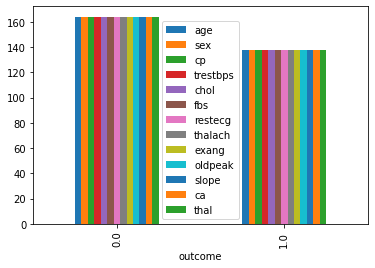

In [ ]:
data.groupby('outcome').count().plot(kind='bar')

In [ ]:
data["outcome"].value_counts()

0.0    164
1.0    138
Name: outcome, dtype: int64

# Parte B: Construcción y evaluación del modelo de regresión logística.

# modelo 1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x = data.drop('outcome',axis=1).values
y = data['outcome']

In [ ]:
# B.1 División de los datos 70/30 en los conjunto de entrenamiento y prueba,
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7)

In [ ]:
# B2 crear un modelo de regresión logística
model1 = LogisticRegression()

In [ ]:
# B3 Cree un modelo glm utilizando todas las variables del dataset
model1.fit(x_train,y_train)

/home/felo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# B4 Use summary para visualizar los valores estadísticos del modelo implementado.
parametros = model1.get_params()
coe = model1.coef_
inter = model1.intercept_
print(f"""
- Parametros del modelo : {parametros}

- Coeficiente del modelo : {coe}

- Intercepto del modelo : {inter}
""")


- Parametros del modelo : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

- Coeficiente del modelo : [[-4.82390215e-02  5.92938639e-01  4.06215203e-01  1.86578810e-02
   8.22021095e-04 -1.21324898e-01  2.69254600e-01 -3.92460477e-02
   4.35160895e-01  4.66049679e-01  1.28451503e-01  1.52736269e+00
   4.55270013e-01]]

- Intercepto del modelo : [-0.03181715]



In [ ]:
# B5 Realice las nuevas predicciones usando el dataset de validación (test).
y1_pred = model1.predict(x_test)
y1_pred

array([0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1.])

In [ ]:
# B6 Evalué el desempeño del modelo implementado, usando las métricas de exactitud, sensibilidad y especificidad. 
model1.score(x_test,y_test)

0.8351648351648352

In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y_test, y1_pred)

array([[44,  7],
       [ 8, 32]])

# modelo 2

In [ ]:
# B7 Seleccione las variables que son más relevantes para predecir el outcome (enfermedad). (Usando summary(model1))
cor = data.corr(method='pearson')
cor

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
age,1.000000,-0.096526,0.105544,0.285079,0.209187,0.118973,0.148186,-0.395610,0.092402,0.204949,0.161294,0.355543,0.127950,0.222564
sex,-0.096526,1.000000,0.004278,-0.065150,-0.201637,0.046022,0.026693,-0.043746,0.143460,0.098322,0.040837,0.098049,0.385006,0.283609
cp,0.105544,0.004278,1.000000,-0.036551,0.071670,-0.041759,0.071871,-0.331576,0.382505,0.199436,0.155132,0.233379,0.263454,0.420632
trestbps,0.285079,-0.065150,-0.036551,1.000000,0.130065,0.175261,0.147138,-0.045097,0.064594,0.189140,0.117672,0.099173,0.133399,0.151470
chol,0.209187,-0.201637,0.071670,0.130065,1.000000,0.009558,0.172046,-0.002706,0.060886,0.046014,-0.003620,0.115959,0.015496,0.086082
fbs,0.118973,0.046022,-0.041759,0.175261,0.009558,1.000000,0.071113,-0.006391,0.024729,0.004514,0.060852,0.145729,0.076867,0.026826
restecg,0.148186,0.026693,0.071871,0.147138,0.172046,0.071113,1.000000,-0.087300,0.087432,0.117510,0.132079,0.124157,0.018739,0.166154
thalach,-0.395610,-0.043746,-0.331576,-0.045097,-0.002706,-0.006391,-0.087300,1.000000,-0.376654,-0.341012,-0.388903,-0.263418,-0.264125,-0.422632
exang,0.092402,0.143460,0.382505,0.064594,0.060886,0.024729,0.087432,-0.376654,1.000000,0.286766,0.259635,0.144791,0.332212,0.435601
oldpeak,0.204949,0.098322,0.199436,0.189140,0.046014,0.004514,0.117510,-0.341012,0.286766,1.000000,0.580643,0.292131,0.342109,0.429146


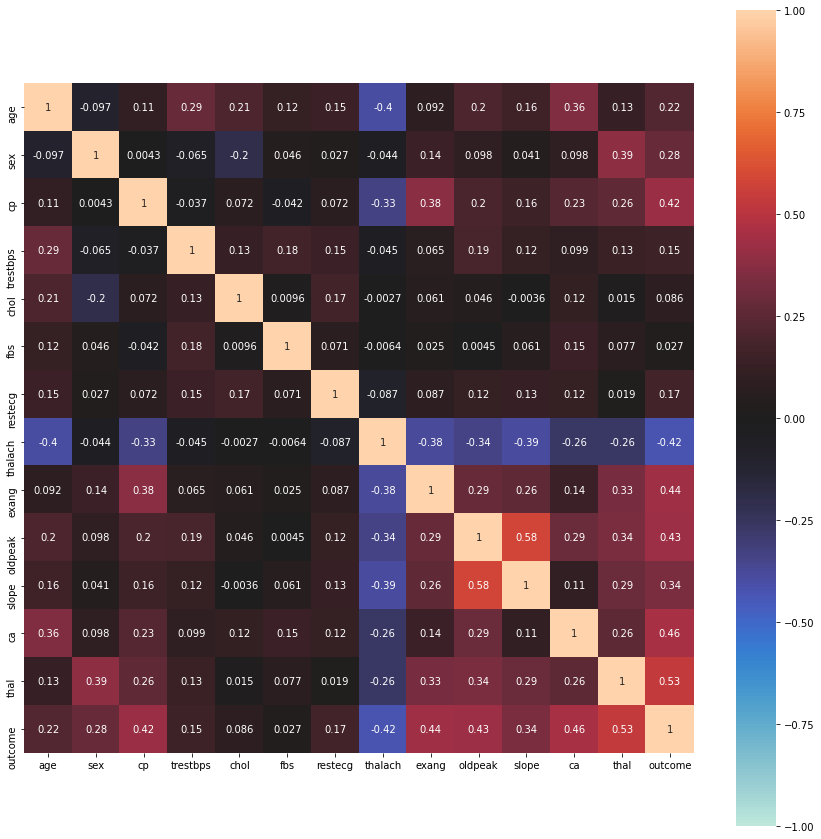

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, vmax=1, vmin=-1, center=0, annot=True, square=True)
plt.show()

In [ ]:
col = []
for columna in cor.columns:
    if (cor[columna][13] > 0.2):
        col.append(columna)
    else:
        continue
print(col)

['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']


In [ ]:
# B8 Cree un nuevo modelo glm utilizando las variables seleccionadas del dataset. Llame el modelo “model2”
x2 = data[['age', 'sex', 'cp', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y2 = data['outcome']

In [ ]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size=0.7)

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(x2_train,y2_train)

/home/felo/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# B9 Realice las nuevas predicciones usando el dataset de validación (test). 
y2_pred = model2.predict(x2_test)
y2_pred 

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0.])

In [ ]:
# B10 Evalué el modelo “model2” con el dataset de validación (test). 
model2.score(x2_test,y2_test)


0.8571428571428571

In [ ]:
parametros = model2.get_params()
coe = model2.coef_
inter = model2.intercept_
print(f"""
- Parametros del modelo : {parametros}

- Coeficiente del modelo : {coe}

- Intercepto del modelo : {inter}
""")


- Parametros del modelo : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

- Coeficiente del modelo : [[0.02427875 0.58795888 0.62072618 1.0418647  0.45983494 0.4045706
  0.91832776 0.39273097]]

- Intercepto del modelo : [-7.88227744]



In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y2_test, y2_pred)

array([[43,  4],
       [ 9, 35]])

# modelo 3

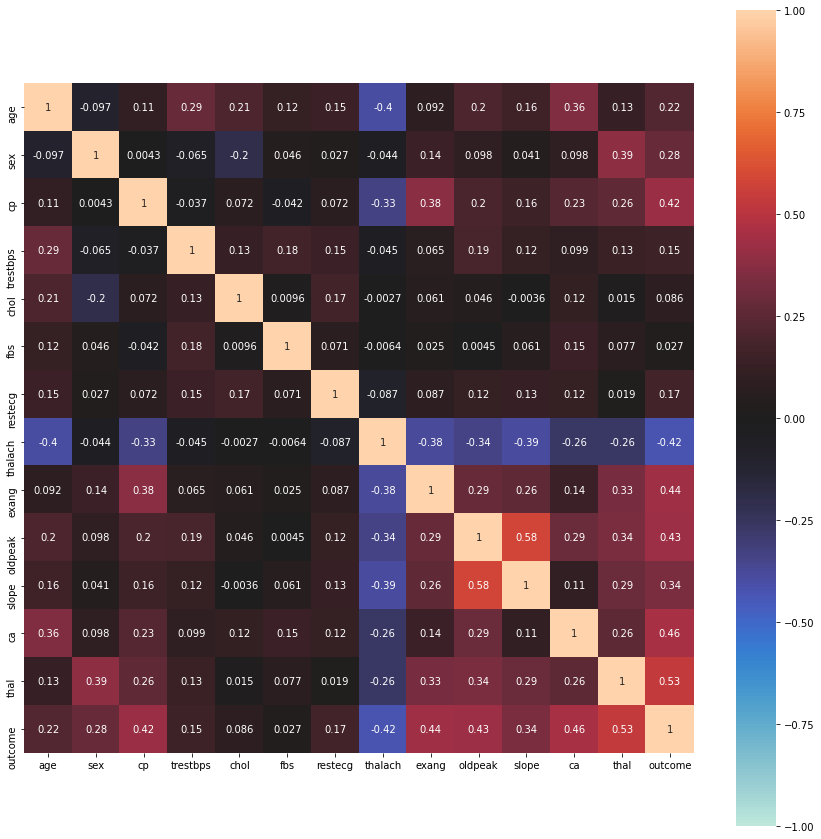

In [ ]:
# B11 Del dataset original encuentre ¿cuáles de las variables están más asociadas(correlacionas) entre sí), esto es con la funcion corr, seleccione una de las dos variables que están correlacionadas, es decir si, age y presión tiene una correlacion alta ( r = 0.90), seleccione una de las dos por ejemplo age. Haga un nuevo dataset con estas variables.    

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, vmax=1, vmin=-1, center=0, annot=True, square=True)
plt.show()

# 

In [ ]:
# B12 Cree un nuevo modelo glm utilizando las variables altamente correlacionadas. Llame el modelo “model3”.
x3 = data[['oldpeak','slope']]
y3 = data['outcome']

In [ ]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, train_size=0.7)

In [ ]:
model3 = LogisticRegression()

In [ ]:
model3.fit(x3_train,y3_train)

LogisticRegression()

In [ ]:
y3_pred =model3.predict(x3_test)
y3_pred

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 0.])

In [ ]:
model3.score(x3_test,y3_test)

0.7362637362637363

In [ ]:
parametros = model3.get_params()
coe = model3.coef_
inter = model3.intercept_
print(f"""
- Parametros del modelo : {parametros}

- Coeficiente del modelo : {coe}

- Intercepto del modelo : {inter}
""")


- Parametros del modelo : {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

- Coeficiente del modelo : [[0.72104032 0.28975675]]

- Intercepto del modelo : [-1.29200455]



In [ ]:
 from sklearn.metrics import confusion_matrix
 confusion_matrix(y3_test, y3_pred)

array([[38, 14],
       [10, 29]])